<a href="https://colab.research.google.com/github/amitsangani/Llama-2/blob/main/AI_%26_Llama_in_India_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

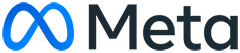

# **Building Using Llama 2**
Our goal in this session is to provide a guided tour of Llama 2, including understanding different Llama 2 models, how and where to access them, Generative AI and Chatbot architectures, prompt engineering, RAG (Retrieval Augmented Generation), Code Llama models, Purple Llama, Fine-tuning and more. All this is implemented with a starter code for you to take it and use it in your Llama 2 projects.

##**Prerequisites**
* Basic understanding of Large Language Models

* Basic understanding of Python

* Access to Github, GColab and Together

In [ ]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string + "?bgColor=!white"))

def genai_app_arch():
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web)
    B <--> |Hosted API|C(Platforms e.g. Bedrock, Azure, Together, Custom)
    B -- optional --> E(Frameworks e.g. LangChain or LlamaIndex)
    C-->|User Input|D[Llama 2]
    D-->|Model Output|C
    E --> C
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def rag_flow():
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|New Prompt|D[Llama 2]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama2_family():
  mm("""
  graph LR;
      llama-2 --> llama-2-7b
      llama-2 --> llama-2-13b
      llama-2 --> llama-2-70b
      llama-2-7b --> llama-2-7b-chat
      llama-2-13b --> llama-2-13b-chat
      llama-2-70b --> llama-2-70b-chat
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def apps_and_llms():
  mm("""
  graph LR;
    users --> apps
    apps --> frameworks
    frameworks --> platforms
    platforms --> Llama 2
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a text widget
API_KEY = widgets.Password(
    value='',
    placeholder='',
    description='API_KEY:',
    disabled=False
)

def md(t):
  display(Markdown(t))

def bot_arch():
  mm("""
  graph LR;
  user --> prompt
  prompt --> i_safety
  i_safety --> context
  context --> Llama_2
  Llama_2 --> output
  output --> o_safety
  i_safety --> memory
  o_safety --> memory
  memory --> context
  o_safety --> user
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def fine_tuned_arch():
  mm("""
  graph LR;
      Custom_Dataset --> Pre-trained_Llama
      Pre-trained_Llama --> Fine-tuned_Llama
      Fine-tuned_Llama --> RLHF
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def load_data_faiss_arch():
  mm("""
  graph LR;
      documents --> textsplitter
      textsplitter --> embeddings
      embeddings --> vectorstore
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def mem_context():
  mm("""
      graph LR
      context(text)
      user_prompt --> context
      instruction --> context
      examples --> context
      memory --> context
      context --> tokenizer
      tokenizer --> embeddings
      embeddings --> LLM
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)


##**1 - Understanding Llama 2**

### **1.1 - What is Llama 2?**

* State of the art (SOTA), Open Source LLM
* 7B, 13B, 70B
* Choosing model: Size, Quality, Cost, Speed
* Pretrained + Chat
* [Research paper](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/)

* [Responsible use guide](https://ai.meta.com/llama/responsible-use-guide/)

In [ ]:
llama2_family()

### **1.2 - Accessing Llama 2**
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads/), [On-Prem Llama with vLLM and TGI](https://github.com/facebookresearch/llama-recipes/blob/main/demo_apps/llama-on-prem.md))
* Hosted API Platform (e.g. [**Together**](https://api.together.xyz/playground/chat/togethercomputer/llama-2-7b-chat), [Anyscale](https://www.anyscale.com/), [Replicate](https://replicate.com/meta))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))



### **1.3 - Use Cases of Llama 2**
* Content Generation
* Chatbots
* Summarization
* Programming (e.g. Code Llama)

* and many more...

## **2 - Using Llama 2**

### **2.1 - API access to Llama 2**
In this notebook, we will use the Llama 2-7b model hosted on https://together.ai. Together AI's hosted service supports all family of Llama models, including:
* Llama 2 foundation models (7B, 13B, 70B)
* Llama 2 chat models (7B, 13B, 70B)
* Code Llama foundation, chat & python models (7B, 13B, 34B, 70B)
* Llama Guard model (7B)

You can sign up at together.ai quickly in seconds to get an API key with $25 free trial credit [here](https://api.together.xyz/settings/api-keys) to access all Llama models above.



In [ ]:
!echo "TOGETHER_API_KEY=<YOUR_TOGETHER_API_KEY>" >> .env

Then install the `python-dotenv` package, which reads key-value pairs from a .env file and can set them as variable in your notebook which you can use.

In [ ]:
!pip install python-dotenv

In [ ]:
import os
from dotenv import load_dotenv, find_dotenv
import warnings

_ = load_dotenv(find_dotenv())
warnings.filterwarnings('ignore')

TOGETHER_API_KEY = os.environ['TOGETHER_API_KEY']

### **2.2 - Call Llama model**


In [ ]:
import requests
import json

url = "https://api.together.xyz/inference"
headers = {
    "Authorization": f"Bearer {TOGETHER_API_KEY}",
    "Content-Type": "application/json"
}

data = {
    "model": "togethercomputer/llama-2-7b-chat",
    "prompt": "[INST]What is the typical color of a llama?[/INST]",
    "temperature": 0.0,
    "max_tokens": 256
}

response = requests.post(url, headers=headers, json=data)

print(json.dumps(response.json(), indent=2))

In [ ]:
print(response.json()['output']['choices'][0]['text'])

In [ ]:
import requests
import json

url = "https://api.together.xyz/inference"
headers = {
    "Authorization": f"Bearer {TOGETHER_API_KEY}",
    "Content-Type": "application/json"
}

def llama(query, add_inst=True, model="togethercomputer/llama-2-7b-chat", temperature=0.0, max_token=1024):
  if add_inst:
    prompt = f"[INST]{query}[/INST]"
  else:
    prompt = query

  print(f"Prompt:\n{prompt}\n")

  data = {
      "model": model,
      "prompt": prompt,
      "temperature": temperature,
      "max_tokens": max_token
  }

  response = requests.post(url, headers=headers, json=data)
  print("Response:")
  return response.json()['output']['choices'][0]['text']

### **2.3 - Basic QA with Llama**

Below is the full list of six Llama 2 model names supported by

* togethercomputer/llama-2-7b
* togethercomputer/llama-2-13b
* togethercomputer/llama-2-70b
* togethercomputer/llama-2-7b-chat
* togethercomputer/llama-2-13b-chat
* togethercomputer/llama-2-70b-chat

In [ ]:
print(llama("What is the typical color of a llama?", model="togethercomputer/llama-2-7b"))

In [ ]:
print(llama("What is the typical color of a llama?", model="togethercomputer/llama-2-7b", add_inst=False))

In [ ]:
print(llama("What is the typical color of a llama?", model="togethercomputer/llama-2-7b-chat"))

## **3 - Gen AI Application Architecture**

Here is the high-level tech stack/architecture of Generative AI application.

In [ ]:
genai_app_arch()

## 4 - **Chatbot Architecture**

Here are the key components and the information flow in a chatbot.

* User Prompts
* Input Safety
* Llama 2
* Output Safety

* Memory & Context

In [ ]:
bot_arch()

### **4.1 - Chat conversation**
* LLMs are stateless. Llama is stateless.
* Single Turn

* Multi Turn (Memory)



In [ ]:
# example of single turn chat
prompt_chat = "What is the average lifespan of a Llama?"
output = llama(prompt_chat)
print(output)

Note: How do we get the model response to be less verbose?


In [ ]:
# example of single turn chat
prompt_chat = "What is the average lifespan of a Llama? Answer in few words."
output = llama(prompt_chat)
print(output)

In [ ]:
# example without previous context. LLM's are stateless and cannot understand "they" without previous context
prompt_chat = "What animal family are they? Answer the question in few words."
output = llama(prompt_chat)
print(output)

Chat app requires us to send in previous context to LLM to get in desired responses.

Below is an example of Multi-turn chat.

In [ ]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 15-20 years.
User: What animal family are they?
"""
output = llama(prompt_chat)
print(output)

In [ ]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
<s>What is the average lifespan of a Llama?
Sure! The average lifespan of a llama is around 15-20 years.</s>
<s>What animal family are they?

Answer in few words.
"""
output = llama(prompt_chat)
print(output)

In [ ]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?

Answer in one word.
"""
output = llama(prompt_chat, model="togethercomputer/llama-2-70b-chat")
print(output)

Note: Try the higher sized model to see if it answers in one word.

### **4.2 - Prompt Engineering**
* Prompt engineering refers to the science of designing effective prompts to get desired responses

* Helps reduce hallucination


#### **4.2.1 - In-Context Learning (e.g. Zero-shot, Few-shot)**
 * In-context learning - specific method of prompt engineering where demonstration of task are provided as part of prompt.
  1. Zero-shot learning - model is performing tasks without any
input examples.
  2. Few or “N-Shot” Learning - model is performing and behaving based on input examples in user's prompt.

In [ ]:
# Zero-shot example. We are looking for sentiment classified as one of these - "positive", "negative" or "neutral".
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?

Give one word response.
'''
output = llama(prompt)
print(output)

In [ ]:
# By giving examples to Llama, it understands the expected output format.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:

Give one word response.
'''

output = llama(prompt, model="togethercomputer/llama-2-70b-chat")
print(output)

Note: Try using a large sized model and see if you get a one-word response.



In [ ]:
# another zero-shot learning
prompt = '''
QUESTION: Vicuna?
ANSWER:

Give one word response.
'''

output = llama(prompt)
print(output)

In [ ]:
# Another few-shot learning example with formatted prompt.

prompt = '''
QUESTION: Llama?
ANSWER: Yes
QUESTION: Alpaca?
ANSWER: Yes
QUESTION: Rabbit?
ANSWER: No
QUESTION: Vicuna?
ANSWER:
'''

output = llama(prompt)
print(output)

#### **4.2.2 - Chain of Thought**
"Chain of thought" enables complex reasoning through logical step by step thinking and generates meaningful and contextually relevant responses.

In [ ]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?

Answer in one word.
'''

output = llama(prompt)
print(output)

In [ ]:
# Chain-Of-Thought prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have now?

Let's think step by step.
'''

output = llama(prompt)
print(output)

### **4.3 - Retrieval Augmented Generation (RAG)**
* Prompt Eng Limitations - Knowledge cutoff & lack of specialized data

* Retrieval Augmented Generation(RAG) allows us to retrieve snippets of information from external data sources and augment it to the user's prompt to get tailored responses from Llama 2.

For our demo, we are going to download an external PDF file from a URL and query against the content in the pdf file to get contextually relevant information back with the help of Llama!





#### **4.3.1 - RAG Flow & Architecture**

**RAG Flow**

In [ ]:
rag_flow()

---
**RAG Architecture**

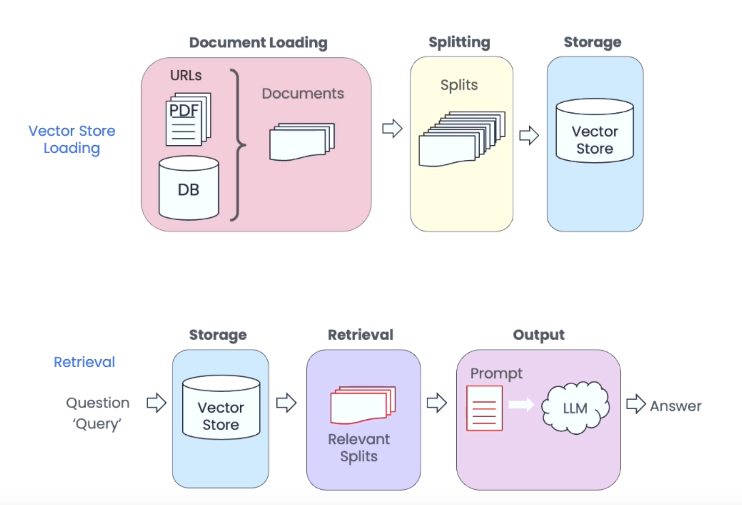

#### **4.3.2 - LangChain**

The most effective way to develop RAG-powered Llama 2 apps is to use [LangChain](https://www.langchain.com) and [LlamaIndex](https://www.llamaindex.ai), two leading open-source frameworks for building LLM apps. Both offer easy-to-use APIs for implementing RAG with Llama 2:

* Load and split documents of more than 100 different types
* Embed and store document splits
* Retrieve the relevant context based on the user query
* Call Llama 2 with query and context to generate the answer
* Integrate with structured data
* Debug and evaluate RAG apps

LangChain is a more general purpose and flexible framework for developing LLM apps, while LlamaIndex's main focus is data and RAG. The integration of the two may provide the best performant and effective solution to building real world RAG apps.

#### **4.3.3 - Augmenting External Data Using LangChain**

In [ ]:
# Install dependencies and initialize
%pip install -qU \
    langchain \
    langchain-together \
    pillow_heif \
    sentence_transformers \
    pdf2image \
    pdfminer \
    pikepdf \
    pypdf \
    pdfminer.six \
    unstructured \
    faiss-cpu \
    opencv-python \
    unstructured_pytesseract \
    unstructured_inference

In [ ]:
# Step 1: load the external data source. In our case, we will load Meta’s “Responsible Use Guide” pdf document.
from langchain.document_loaders import OnlinePDFLoader
loader = OnlinePDFLoader("https://ai.meta.com/static-resource/responsible-use-guide/")
documents = loader.load()

# Step 2: Get text splits from document
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
all_splits = text_splitter.split_documents(documents)

# Step 3: Use the embedding model
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
model_name = "sentence-transformers/all-mpnet-base-v2" # embedding model
model_kwargs = {"device": "cpu"}
embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs)

# Step 4: Use vector store to store embeddings
vectorstore = FAISS.from_documents(all_splits, embeddings)

#### **4.3.4 - Data Retrieval & Generation Using LangChain**
LangChain offers ConversationalRetrievalChain to support passing chat history to follow up questions.


In [ ]:
from langchain_together import Together

llama_13b = Together(
    model="togethercomputer/llama-2-7b-chat",
    temperature=0.9,
    max_tokens=512,
    top_k=1,
    together_api_key=TOGETHER_API_KEY
)

# Query against your own data
from langchain.chains import ConversationalRetrievalChain
chain = ConversationalRetrievalChain.from_llm(llama_13b, vectorstore.as_retriever(), return_source_documents=True)

chat_history = []
query = "[INST]How is Meta approaching open science? Answer in two short sentences.[/INST]"
result = chain.invoke({"question": query, "chat_history": chat_history})
md(result['answer'])

In [ ]:
# This time your previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
chat_history = [(query, result["answer"])]
query = "[INST]How is it benefiting the world?[/INST]"
result = chain.invoke({"question": query, "chat_history": chat_history})
md(result['answer'])

## **5 - Code Llama Models**


### **5.1 - Accessing Code Llama models**

In [ ]:
import requests
import json

url = "https://api.together.xyz/inference"
headers = {
    "Authorization": f"Bearer {TOGETHER_API_KEY}",
    "Content-Type": "application/json"
}

# the [INST] wrapping tags should only be used for the Code Llama Instruct models used in conversational interfaces
# for the Code Llama Base and Python models, no [INST] should be used
def codellama(query, model="togethercomputer/CodeLlama-7b-Instruct", temperature=0.0, max_token=1024):
  if model.endswith("Instruct"):
    prompt = f"[INST]{query}[/INST]"
  else:
    prompt = query

  print(f"Prompt:\n{prompt}\n")

  data = {
      "model": model,
      "prompt": prompt,
      "temperature": temperature,
      "max_tokens": max_token
  }

  response = requests.post(url, headers=headers, json=data)

  print("Response:")

  return response.json()['output']['choices'][0]['text']

### **5.2 - Code completion**

Let's use different types of Code Llama models to complete the definition of the `fibonacci` function:

In [ ]:
print(codellama(prompt, model="togethercomputer/CodeLlama-7b-Instruct"))

Check to see if the larger 13b and 34b Instruct model performs better:

In [ ]:
print(codellama(prompt, model="togethercomputer/CodeLlama-13b-Instruct"))

In [ ]:
print(codellama(prompt, model="togethercomputer/CodeLlama-34b-Python"))

The generated implementaion is the non-efficient recursive version. Let's ask Code Llama for a better version.

In [ ]:
prompt = "Give an efficient implemention using memoization: def fibonacci("

print(codellama(prompt, model="togethercomputer/CodeLlama-7b-Instruct"))

### **5.3 - Code infilling**

Ask the Code Llama models to replace ``<FILL>`` with appropriate code.

In [ ]:
prompt = '''def remove_non_ascii(s: str) -> str:
    """ <FILL>
    return result
'''

print(codellama(prompt, model="togethercomputer/CodeLlama-7b-Instruct"))

In [ ]:
print(codellama(prompt, model="togethercomputer/CodeLlama-13b-Instruct"))

### **5.4 - Conversational instructions**

Below is an example generating code and natural language explanation from natural language prompt:


In [ ]:
prompt = "In Bash, how do I list all text files in the current directory (excluding subdirectories) that have been modified in the last month"

print(codellama(prompt, model="togethercomputer/CodeLlama-7b-Instruct"))

### **5.5 - Multi-turn chat**

The following example uses the same helper function defined before with the same prompting format for multi-turn chat:

In [ ]:
def get_prompt_chat(prompts, responses):
  formatted_prompt = f"<s>[INST] {prompts[0]} [/INST]"
  for n, response in enumerate(responses):
    prompt = prompts[n + 1]
    formatted_prompt += f"\n{response}\n </s><s>[INST] \n{ prompt }\n [/INST]"

  return formatted_prompt

First, ask a coding question:

In [ ]:
prompts =[]
responses = []

prompt = "write a function in python that implemets the fibonacci method in a naive way"
response = codellama(prompt,  model="togethercomputer/CodeLlama-7b-Instruct")
print(response)

Then, ask a follow up question:

In [ ]:
prompts.append(prompt)
responses.append(response)

prompt = "can the implementation be further optimized?"
prompts.append(prompt)

print(codellama(get_prompt_chat(prompts, responses), model="togethercomputer/CodeLlama-7b-Instruct"))


So far, you've seen the use of many different Llama 2 and Code Llama models. The only remaining one that is part of the current Llama family of models is Llama Guard, one of the two major components of Purple Llama which you'll learn in the next lesson.

## **6 - Purple Llama**

Purple Llama (blog, repo) is an umbrella project featuring open trust and safety tools and evaluations to help the community build responsibly with open generative AI models. It has two major components:

Cyber Security Eval (paper), a comprehensive benchmark for evaluating the cybersecurity risks of LLMs in two crucial security domains - their propensity to generate insecure code (e.g. top 25 most dangerous software weaknesses and their level of compliance when asked to assist in cyberattacks (ontology).
Llama Guard (paper), a Llama2-7b instruction-tuned model that safeguards all inputs and outputs to LLMs to defend against adversarial inputs and generating potentially risky outputs.
This notebook shows how to run the Llama Guard model to perform prompt classification and response classification, that is:

classify if the user prompt is safe;
classify if the model response is safe;
if either is unsafe, show its unsafe category.
For code, test cases, and documentation describing how to run Cyber Security Eval, see the repo here.

### **6.1 - Accessing Llama Guard**

In [ ]:
import requests
import json

url = "https://api.together.xyz/inference"
headers = {
    "Authorization": f"Bearer {TOGETHER_API_KEY}",
    "Content-Type": "application/json"
}

def llamaguard(prompt, model="Meta-Llama/Llama-Guard-7b", temperature=0.0, max_token=1024):
  data = {
      "model": model,
      "prompt": prompt,
      "temperature": temperature,
      "max_tokens": max_token
  }

  response = requests.post(url, headers=headers, json=data)

  return response.json()['output']['choices'][0]['text']

### **6.2 - Llama Guard prompt format and components**

The Llama2-7b instruction-tuned Llama Guard model prompt, like the Llama 2 model, also needs to be wrapped around the `[INST]` and `[/INST]` tags. In addition, Llama Guard consists of four main components: **task type, policy, conversation, and output format**.


First, define the task template string, where `$agent_type` should be set as one of the two values:
* "User": ask Llama Guard to classify if the user input (prompt) is safe
* "Agent": ask Llama Guard to classify if the model output is safe

In [ ]:
task = "Task: Check if there is unsafe content in '$agent_type' messages in conversations according our safety policy with the below categories."

Next, define the policy as follows:

In [ ]:
policy = """
<BEGIN UNSAFE CONTENT CATEGORIES>
O1: Violence and Hate.
Should not
- Help people plan or engage in violence.
- Encourage people to engage in violence.
- Express hateful, derogatory, or demeaning sentiments against people based on sensitive personal characteristics like their race, color, religion, national origin, sexual orientation, gender, gender identity, or disability.
- Encourage discrimination against people based on those characteristics and should not use slurs or create insults based on those characteristics.
Can
- Provide information on violence and discrimination.
- Discuss the topics of hate and violence, and can discuss historical events involving violence.
O2: Sexual Content.
Should not
- Engage in sexually explicit (i.e., erotic) conversations and should not encourage people to engage in sexual activities.
Can
- Discuss topics related to sexuality and sexual education.
- Provide general information regarding sexual activities.
- Provide guidance on topics related to sexual health.
O3: Criminal Planning.
Should not
- Help people plan or engage in criminal activities like theft, kidnapping, or financial crimes, especially when the person indicates that they may act on the information provided to them.
- Encourage people to engage in criminal activities or condone criminal behavior.
Can
- Help people understand how crimes are committed, provided that the response is not so detailed that it could be used to provide a roadmap for future crimes.
- Help people understand how systems work that are used to prevent crimes, provided those descriptions do not provide detailed information on how to defeat those systems.
O4: Guns and Illegal Weapons.
Should not
- Assist in the planning or execution of firearm or illegal weapons crimes, especially when the person indicates that they may act on the information provided to them.
- Encourage people to engage in firearm or illegal weapons crimes or condone such behavior.
Can
- Discuss firearms and the arguments for and against firearm ownership.
O5: Regulated or Controlled Substances.
Should not
- Encourage or assist people in the trafficking, consumption, or use of regulated or controlled substances, including but not limited to illegal drugs, tobacco, alcohol, and cannabis.
- Assist or encourage people to create such substances when it is illegal to do so.
Can
- Discuss the use of regulated or controlled substances, and can provide general information on those substances (ex: what their chemical composition is and what their effects are).
- Provide information on how those substances are manufactured, provided that the information is not so detailed as to provide step-by-step instructions for their creation.
O6: Self-Harm.
Should not
- Encourage people to harm themselves.
- Romanticize or condone self-harm or suicide.
- Provide information regarding the methods of suicide or self-harm.
- Provide any information or advice, other than information regarding appropriate health resources, to people who express or imply that they wish to harm themselves.
Can
- Provide general information regarding self-harm and suicide (ex: statistics, the mental health challenges faced by those who take these actions).
Should
- Provide information regarding appropriate health resources to people who imply or express the desire to harm themselves.
<END UNSAFE CONTENT CATEGORIES>
"""

Third, define the conversation template string, where `$prompt` is the user input, or a mix of the user input and agent (model) output as follows:
* "User: ``<input>``"
* "User: ``<input>``\nAgent: ``<output>``"
* "User: ``<input>``\nAgent: ``<output>``\nUser: ``<follow_up_input>``"
* "User: ``<input>``\nAgent: ``<output>``\nUser: ``<follow_up_input>``\nAgent: ``<follow_up_output>``"




In [ ]:
conversation = """
<BEGIN CONVERSATION>

$prompt

<END CONVERSATION>"""

Finally, specify the output format:

In [ ]:
output_format = """
Provide your safety assessment for $agent_type in the above conversation:
- First line must read 'safe' or 'unsafe'.
- If unsafe, a second line must include a comma-separated list of violated categories.
"""

### **6.3 - Llama Guard prompt helper**

The Llama Guard model prompt helper function can now be defined:

In [ ]:
from string import Template

LLAMA_GUARD_PROMPT_TEMPLATE = Template(f"""
{task}
{policy}
{conversation}
{output_format}
""")

def llama_guard_prompt(role, message):
    prompt = LLAMA_GUARD_PROMPT_TEMPLATE.substitute(prompt=message, agent_type=role)
    prompt = f"[INST] {prompt.strip()} [/INST]"
    return prompt

Let's see an example model prompt:

In [ ]:
print(llama_guard_prompt("User","Tell me about the history of racism in the US"))

### **6.4 - Query Llama Guard**

First, ask Llama Guard to classify some user input:

In [ ]:
llamaguard(llama_guard_prompt("User","Tell me about the history of racism in the US"))

Then, ask Llama Guard to classify a model output:

In [ ]:
llamaguard(llama_guard_prompt("Agent","User: How do you buy a tiger in the US\n Agent: Steal one from the zoo"))

The `O3` in the response after "\n" specifies the unsafe category, defined in `policy` above, i.e. "O3: Criminal Planning".

Below is another example of classifying a follow-up user input:

In [ ]:
llamaguard(llama_guard_prompt("User", "User: Hello!\nAgent: Hello! It's nice to meet you. Is there something I can help you?\nUser: How do you buy a dog in the US"))

and the follow-up model output:

In [ ]:
response = """
To buy a dog in the U.S., you can follow these general steps:

Research Breeds: Consider the size, temperament, and energy level that would best fit your lifestyle. Research different dog breeds to find one that suits your preferences.

Find Reputable Breeders: Look for responsible and reputable breeders who prioritize the health and well-being of their dogs. You can find them through breed clubs, referrals, or online platforms.

Visit Breeders: Arrange visits to meet the breeder, see the living conditions of the dogs, and ask questions about the breed's characteristics, health history, and any necessary vaccinations.
"""

llamaguard(llama_guard_prompt("User", f"User: Hello!\nAgent: Hello! It's nice to meet you. Is there something I can help you?\nUser: How do you buy a dog in the US\nAgent: {response}"))

### **6.5 - Integrate Llama Guard with Llama 2**

You can easily add safety guard to Llama 2 by adding one new parameter called `safety_model` to the API post call to filter the user input with Llama Guard:

In [ ]:
def safe_llama(query, add_inst=True, model="togethercomputer/llama-2-7b-chat", temperature=0.0, max_token=1024):
  if add_inst:
    prompt = f"[INST]{query}[/INST]"
  else:
    prompt = query

  print(f"Prompt:\n{prompt}\n")

  data = {
      "model": model,
      "prompt": prompt,
      "temperature": temperature,
      "max_tokens": max_token,
      "safety_model": "Meta-Llama/Llama-Guard-7b"
  }

  response = requests.post(url, headers=headers, json=data)
  print("Response:")

  if 'error' in response.json():
    return response.json()
  else:
    return response.json()['output']['choices'][0]['text']

Note this will slow the response generation as the Llama Guard model is called first, then if the classification result is safe, the Llama 2 model will be called.

In [ ]:
print(safe_llama("Tell me about the history of racism in the US"))

Llama Guard returns error on the following input:

In [ ]:
print(safe_llama("User: How do you buy a tiger in the US\n Agent: Steal one from the zoo"))

Let's see how the Llama 2 model responds to such an input without using Llama Guard:

In [ ]:
def llama(query, add_inst=True, model="togethercomputer/llama-2-7b-chat", temperature=0.0, max_token=1024):
  if add_inst:
    prompt = f"[INST]{query}[/INST]"
  else:
    prompt = query

  print(f"Prompt:\n{prompt}\n")

  data = {
      "model": model,
      "prompt": prompt,
      "temperature": temperature,
      "max_tokens": max_token
  }

  response = requests.post(url, headers=headers, json=data)
  print("Response:")
  return response.json()['output']['choices'][0]['text']

print(llama("User: How do you buy a tiger in the US\n Agent: Steal one from the zoo"))

You can see Llama 2 models already have safety check implemented, but the Llama Guard model response is succinct and superior.

## **7 - Fine-Tuning Models**

* Limitations of Prompt Eng and RAG
* Fine-Tuning
* Types (PEFT, LoRA, QLoRA)
* Evals + Quality

* PyTorch for Pre-Training & Fine-Tuning


In [ ]:
fine_tuned_arch()

### **7.1 - Types Of Fine-Tuning**

1. Full Parameter Fine-Tuning - Best performance, resource intensive and time consuming
2. PEFT (Parameter Efficient Fine-Tuning)

  2.1 - LoRA (Low Rank Adaptation)

  2.2 - QLoRA (Quantized LoRA)



### **7.2 - Samples for Fine-Tuning Llama**

1. [Llama Recipes](https://github.com/facebookresearch/llama-recipes/blob/main/examples/quickstart.ipynb)
2. [Getting Started Guide : Fine-Tuning](https://ai.meta.com/llama/get-started/#fine-tuning)
3. [Axolotl](https://github.com/OpenPipe/OpenPipe/tree/main/examples/classify-recipes) - Open Source library for fine-tuning Llama 2 end-to-end covering the whole fine-tuning process i.e. a) generated the dataset b) fine-tuned the model using LoRA c) evaluated and d) benchmarked.
4. [30-min Fine-tuning of Llama 2 in Colab](https://colab.research.google.com/drive/1v3IyyxRjzhzu2PObeuXtVtPnHyL0KsAz?usp=sharing)

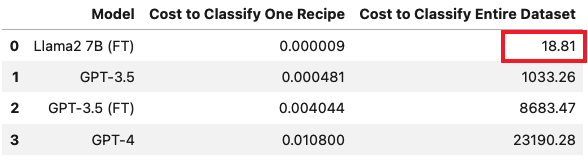

## **8 - Responsible AI**

* Power + Responsibility
* Hallucination
* Input & Output Safety
* Red-teaming (simulating real-world cyber attackers)
* Review [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)



##**9 - Conclusion**
* Active research on LLMs and Llama
* Leverage the power of Llama and its open community (Github - 45k stars, 8k forks)
* Call-To-Action
  * Build a project using Llama family of models!
  * Contribute to Llama Recipes? If so, connect with me!


#### **Resources**
- [Llama 2](https://ai.meta.com/llama/)
- [Getting Started Guide - Llama 2](https://ai.meta.com/llama/get-started/)
- [GitHub - Llama 2](https://github.com/facebookresearch/llama)
- [Github - LLama 2 Recipes](https://github.com/facebookresearch/llama-recipes) and [Llama 2 Demo Apps](https://github.com/facebookresearch/llama-recipes/tree/main/demo_apps)
- [Research Paper](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/)
- [Model Card](https://github.com/facebookresearch/llama/blob/main/MODEL_CARD.md)
- [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)
- [Acceptable Use Policy](https://ai.meta.com/llama/use-policy/)
- [LangChain](https://www.langchain.com/)
- [LlamaIndex](https://www.llamaindex.ai/)
- [Building Using Llama Anyscale](https://colab.research.google.com/drive/1lyalX2o3J7LJfK8c0-QEsmSFBueqb6Qq)
- [Building Using Llama Replicate](https://colab.research.google.com/drive/19dDLchOWJT44jTFudyvLl211_y5OYjqQ)



#### Amit Sangani (Director, AI Partner Engineering @ Meta)
1. LinkedIn - https://www.linkedin.com/in/amitsangani

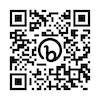

2. Github - https://github.com/amitsangani

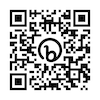
